In [1]:
import numpy as np
import pandas as pd

import sys
sys.path.append('..')

import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

from sklearn.metrics import confusion_matrix
import itertools

import matplotlib.pyplot as plt
from helpers.plots import plot_imgs


Using TensorFlow backend.


# Classifier

In [18]:
batch_size = 128
num_classes = 10
epochs = 12

nb_train = 5000
nb_test = 200


## Dataset

In [19]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()


In [20]:
X_train = [x.ravel() for x in x_train]
X_train = X_train[:nb_train]
Y_train = y_train[:nb_train]

X_test = [x.ravel() for x in x_test]
X_test = X_test[:nb_test]
Y_test = y_test[:nb_test]


In [21]:
X_train = np.array(X_train).astype('float32')
X_test = np.array(X_test).astype('float32')
X_train /= 255
X_test /= 255

Y_train = keras.utils.to_categorical(Y_train, num_classes)
Y_test = keras.utils.to_categorical(Y_test, num_classes)

X_train.shape, Y_train.shape, X_test.shape, Y_test.shape

((5000, 784), (5000, 10), (200, 784), (200, 10))

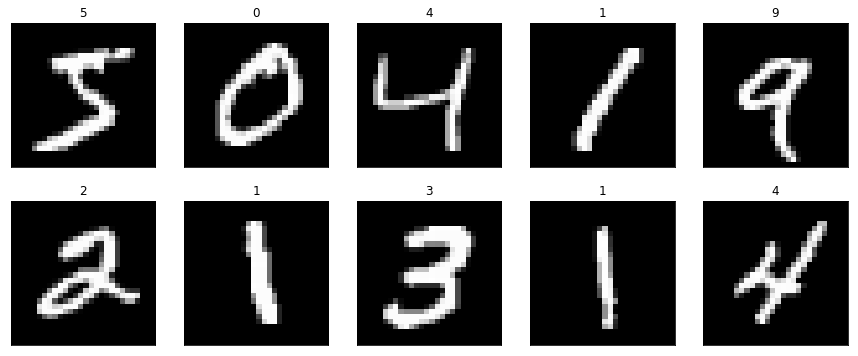

In [22]:
plot_imgs(X_train, Y_train, shape=(28, 28))

## Model definition

In [23]:
model = Sequential()
model.add(Dense(10, input_dim=X_train.shape[1], activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

## Model fit

In [24]:
model.fit(X_train, Y_train, batch_size=batch_size, epochs=epochs)


Instructions for updating:
Use tf.cast instead.
Epoch 1/12
5000/5000 [==============================] - 1s 119us/step - loss: 1.7775 - acc: 0.5974
Epoch 2/12
5000/5000 [==============================] - 0s 22us/step - loss: 1.1394 - acc: 0.8030
Epoch 3/12
5000/5000 [==============================] - 0s 24us/step - loss: 0.8172 - acc: 0.8420
Epoch 4/12
5000/5000 [==============================] - 0s 22us/step - loss: 0.6409 - acc: 0.8636
Epoch 5/12
5000/5000 [==============================] - 0s 19us/step - loss: 0.5393 - acc: 0.8792
Epoch 6/12
5000/5000 [==============================] - 0s 23us/step - loss: 0.4740 - acc: 0.8908
Epoch 7/12
5000/5000 [==============================] - 0s 24us/step - loss: 0.4285 - acc: 0.8996
Epoch 8/12
5000/5000 [==============================] - 0s 25us/step - loss: 0.3946 - acc: 0.9044
Epoch 9/12
5000/5000 [==============================] - 0s 20us/step - loss: 0.3678 - acc: 0.9078
Epoch 10/12
5000/5000 [==============================] - 0s 23us/step

In [26]:
print('Train: ', model.evaluate(X_train, Y_train))
print('Test: ', model.evaluate(X_test, Y_test))


5000/5000 [==============================] - 0s 42us/step
Train:  [0.3060992717027664, 0.92]
200/200 [==============================] - 0s 63us/step
Test:  [0.32398075342178345, 0.935]


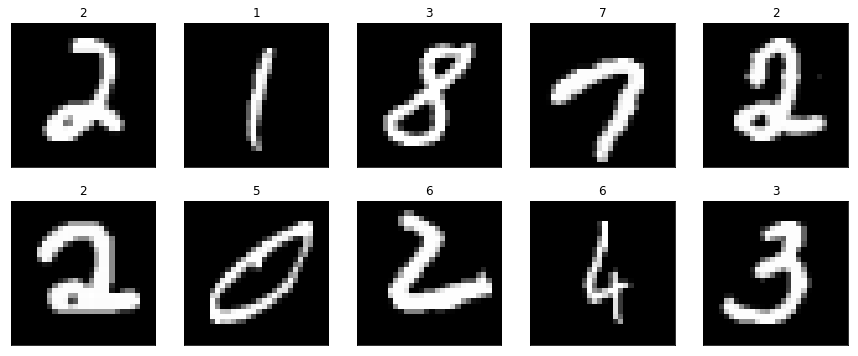

In [27]:
Y_pred = model.predict(X_train)
plot_imgs(X_train, Y_pred, shuffle=True, shape=(28, 28))


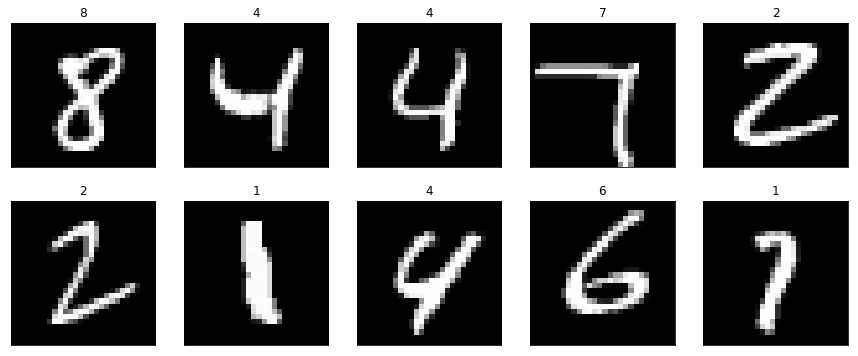

In [28]:
Y_pred = model.predict(X_test)
plot_imgs(X_test, Y_pred, shuffle=True, shape=(28, 28))
